### **Features e labels - Descrição e Análise exploratória**

Age- Idade do cliente
Employment Type- O setor em que o cliente trabalha \
  - Valores (Público, Privado) \

GraduateOrNot- Se o cliente possui graduação ou não \
  - Valores (1 = sim, 0 = não)

AnnualIncome- O ganhou anual do cliente em rúpias indianas

FamilyMembers- Número de membros na família do cliente

ChronicDisease- Se o cliente possui algum problema grave de saúde
- Valores (1 = sim, 0 = não)

FrequentFlyer- Avaliação se o cliente viajou muito de avião (entre 2017 e 2019)
- Valores (1 = sim, 0 = não)

EverTravelledAbroad- Se o cliente já viajou para algum país estrangeiro
- Valores (1 = sim, 0 = não)

TravelInsurance- Se o cliente obteve seguro de viagem
- Valores (1 = sim, 0 = não)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Airplane/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:

df.dropna()

df['Employment Type'].replace(['Government Sector','Private Sector/Self Employed'],[1,0],inplace=True)
df['GraduateOrNot'].replace(['Yes','No'],[1,0],inplace=True)
df['FrequentFlyer'].replace(['Yes','No'],[1,0],inplace=True)
df['EverTravelledAbroad'].replace(['Yes','No'],[1,0],inplace=True)

df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   Employment Type      1987 non-null   int64
 3   GraduateOrNot        1987 non-null   int64
 4   AnnualIncome         1987 non-null   int64
 5   FamilyMembers        1987 non-null   int64
 6   ChronicDiseases      1987 non-null   int64
 7   FrequentFlyer        1987 non-null   int64
 8   EverTravelledAbroad  1987 non-null   int64
 9   TravelInsurance      1987 non-null   int64
dtypes: int64(10)
memory usage: 155.4 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09b5f67bd0>],
      dtype=object)

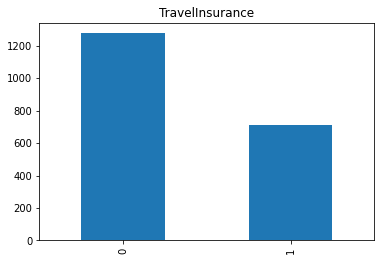

In [ ]:
df['TravelInsurance'].value_counts().plot.bar(subplots=True)

Esse gráfico representa a distribuição dos clientes que contrataram/não contrataram o seguro viagem. Como é possível observar, a maioria dos clientes não contratou (cerca de 2/3 da amostra)

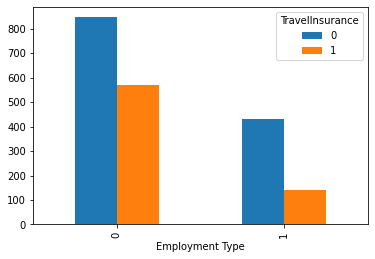

In [ ]:
pd.crosstab([df['Employment Type']], df['TravelInsurance']).plot.bar()

Aqui é possível observar que existe uma amostra menor de funcionários do estado do que em empresas privadas. Sendo que em proporção, os funcionários de empresas privadas contrataram mais do que funcionários do estado:

- Mais da metade dos funcionários de empresas privadas contrataram seguro viagem
- Menos da metade dos funcionários do estado contrataram

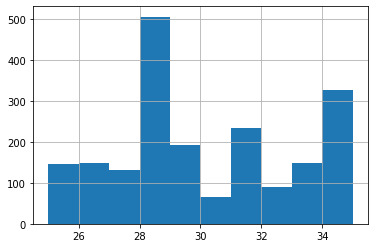

In [ ]:
df['Age'].hist()

Pelo gráfico de distribuição vemos que a maioria dos clientes está concentrada entre os 28 e 30 anos.

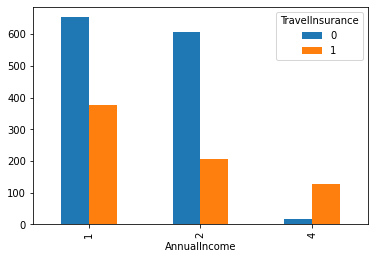

In [ ]:
pd.crosstab([df['AnnualIncome']], df['TravelInsurance']).plot.bar()

Proporcionalmente falando, pessoas com uma alta renda anual contratam mais o seguro viagem, fenômeno que pode ser justificado pelo seu maior poder aquisitivo.

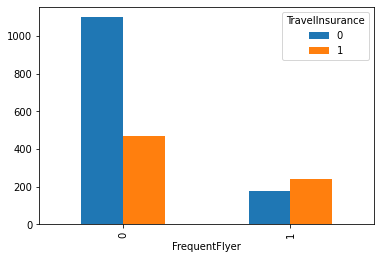

In [ ]:
pd.crosstab([df['FrequentFlyer']], df['TravelInsurance']).plot.bar()

Aqui é evidenciado que aqueles clientes que viajam frequentemente contratam proporcionalmente mais do que aqueles que não viajam frequentemente

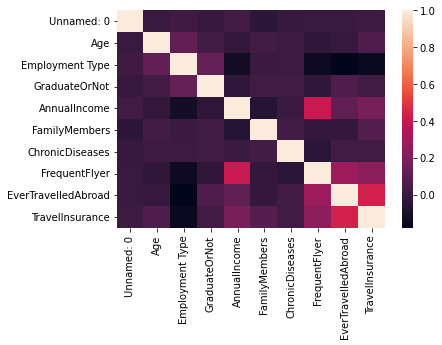

In [ ]:
sns.heatmap(df.corr())

Aqui vemos que a maior correlação com o aspecto de contratar ou não um seguro se dá pelo fato de se o cliente já viajou alguma vez para um país estrangeiro, seguida de se ele é uma pessoa que viaja frequentemente. O ganho anual nesse caso apresentou uma correlação baixa, porém maior que o resto das features.

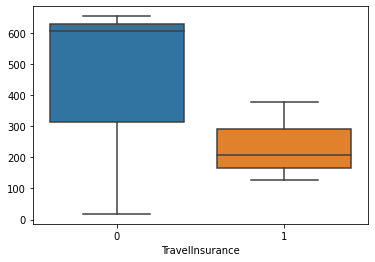

In [ ]:
sns.boxplot(data=pd.crosstab([df['AnnualIncome']], df['TravelInsurance'])[:10])

Como é possível ver nesse boxplot, a grande maioria dos clientes que contrataram ou não um seguro viagem se encontra na faixa dos 200-300mil por ano. Quem ganha mais do que isso tende a não contratar o seguro viagem, como é possível notar na distribuição dos quartis.

### **Modelo**

In [ ]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
treino = df.drop('TravelInsurance',axis=1)
kmeans=KMeans(n_clusters=2)
kmeans.fit(treino)
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

Removendo a coluna referente à contratação ou não do seguro viagem, para que o modelo tente fazer o agrupamento sem essa métrica. Após isso, realizamos a clusterização.

In [ ]:
kmeans.score(treino)*-1**0.5 

69576378251922.83

O score não é para ser utilizado como métrica nesse caso, dado que ele é um modelo de aprendizado não-supervisionado e aprsenta apenas a média da somatória das distâncias. Dessa maneira, o que realmente importa para a análise aqui é identificar padrões nos gráficos de pares de dimensões.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


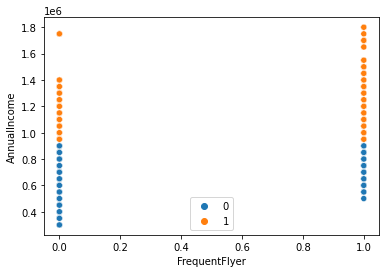

In [ ]:
sns.scatterplot(treino['FrequentFlyer'],treino["AnnualIncome"],hue=kmeans.labels_)

Esse gráfico revela que:

- Há bastante relação entre um cliente ser uma pessoa que viaja frequentemente com a contratação ou não de um seguro-viagem. Vemos que, a maioria das pessoas que contrataram viajam frequentemente, enquanto a maioria das que não contrataram viajam pouco.
- O ganho anual dos clientes que viajam frequentemente tende ser maior do que os que não viajam, o que evidencia algo óbvio: viaja mais quem tem mais dinheiro. 
- O algoritmo detectou que pessoas com uma renda menor tendem a contratar menos  um seguro viagem do que pessoas com uma renda maior. Isso pode se dever ao fato delas justamente não terem tanto poder aquisitivo assim. Logo, a renda é definitivamente um fator decisivo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


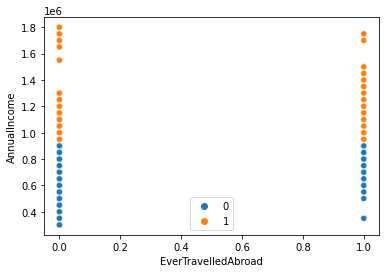

In [ ]:
sns.scatterplot(treino['EverTravelledAbroad'],treino["AnnualIncome"],hue=kmeans.labels_)

Pontos a serem observados:
- Aqui é possível ver que o fato de um cliente ter ou não viajado para algum país estrangeiro pode ser considerado um fator importante pois a ocorrência de pessoas que não contrataram um seguro são aquelas que não viajaram para países estrangeiros.
- Além disso, é possível ver novamente que pessoas com uma renda maior tendem a contratar mais.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


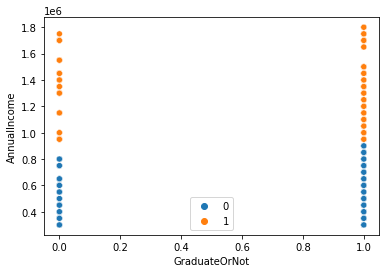

In [ ]:
sns.scatterplot(treino['GraduateOrNot'],treino["AnnualIncome"],hue=kmeans.labels_)

Analisando a questão de se um cliente é graduado ou não, podemos perceber que: 
- A graduação pode ser considerado um fator importante na hora da contratação, pois vamos que a maioria das contratações nesse gráfico ocorreram entre graduados. 
- Apesar disso, é muito importante ressaltar que as pessoas graduadas também tendem a ter uma renda maior(como também pode ser visto no gráfico). E como a renda se mostrou o fator mais decisivo de todos, não é possível afirmar que a graduação ou não de um cliente é um fator realmente importante, pois ele está diretamente ligado à renda. Dessa maneira, a graduação pode ser considerada um fator secundário. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


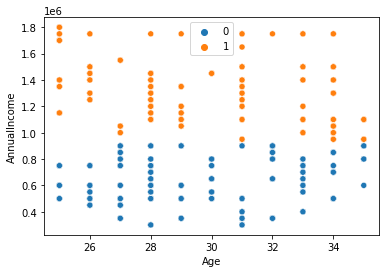

In [ ]:
sns.scatterplot(treino['Age'],treino["AnnualIncome"],hue=kmeans.labels_)

Olhando para as idades, vemos que os clientes registrados possuem uma média de idade entre 20 e 40 anos. Desse modo:
- A maioria das contratações provém de clientes entre 28 e 31 anos com uma renda alta. Mas mesmo assim, não é possível afirmar que a idade seja um fator tão decisivo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


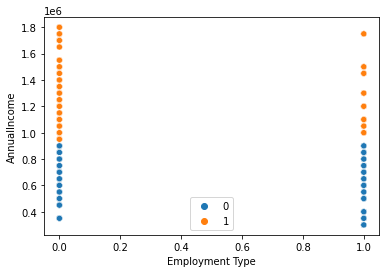

In [ ]:
sns.scatterplot(treino['Employment Type'],treino["AnnualIncome"],hue=kmeans.labels_)

Esse gráfico evidencia que clientes que trabalham para o estado contrataram bem menos em relação à clientes do setor privado. Como dito anteriormente, a renda é o principal fator, e a àrea do seu trabalho está diretamente associada a ela. Sendo assim, temos mais um fator que não é o principal. O que pode ser constatado é que pessoas do setor privado tendem a ganhar mais do que pessoas do setor estatal.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


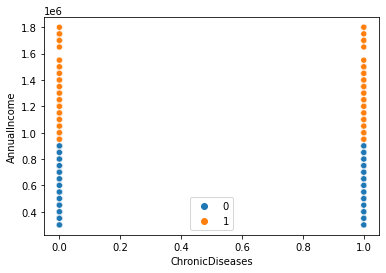

In [ ]:
sns.scatterplot(treino['ChronicDiseases'],treino["AnnualIncome"],hue=kmeans.labels_)

Esse gráfico mostra que não há relação alguma entre a contratação do seguro  de um cliente com o fato dele ter ou não de doenças crônicas. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


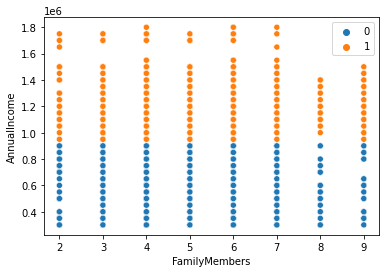

In [ ]:
sns.scatterplot(treino['FamilyMembers'],treino["AnnualIncome"],hue=kmeans.labels_)

Aqui é possível ver que existe pouquíssima relação entre o número de familiares com a contratação. O único fator a ser analisado é que em famílias de 8 pessoas ou mais, a renda anual dos clientes tende a ser um pouco menor, então consequentemente há menor chance de contratação.

In [ ]:
teste = df
kmeans2=KMeans(n_clusters=2)
kmeans2.fit(teste)
kmeans2.labels_

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

Usando a dataframe com a coluna de contratação ou não para teste, com o objetivo de verificar se há uma grande diferença nos agrupamentos.

In [ ]:
kmeans2.score(teste)*-1**0.5

69576378252341.53

Analisando o score de teste, ele se manteve extremamente parecido com o valor do treino (uma diferença mínima), então os agrupamentos se mantiveram os mesmos. Desse modo, vamos analisar os pares de dimensões em teste.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


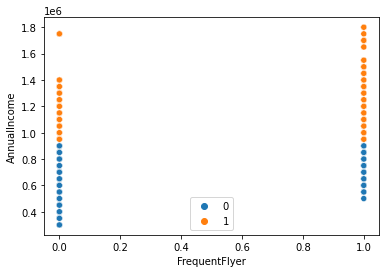

In [ ]:
sns.scatterplot(teste['FrequentFlyer'],teste["AnnualIncome"],hue=kmeans2.labels_)

Os agrupamentos estão praticamente iguais. A renda ainda é o fator mais decisivo e o fato de uma pessoa viajar frequentemente ou não depende muito da renda, então é um fator secundário, mas relevante.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


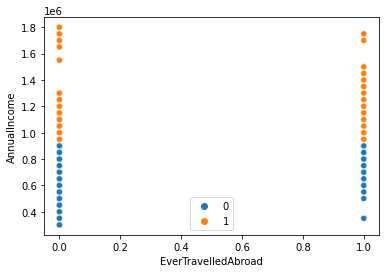

In [ ]:
sns.scatterplot(teste['EverTravelledAbroad'],teste["AnnualIncome"],hue=kmeans2.labels_)

Os agrupamentos se mostraram iguais nesse caso também. Logo é possível concluir que o modelo foi eficaz para fazer os clusters tanto em treino quanto em teste. As interpretações de treino permanecem as mesmas e isso é o mais importante.